<a href="https://colab.research.google.com/github/LucasMeirellesS/biblioteca_pandas/blob/main/Case_Varejo_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

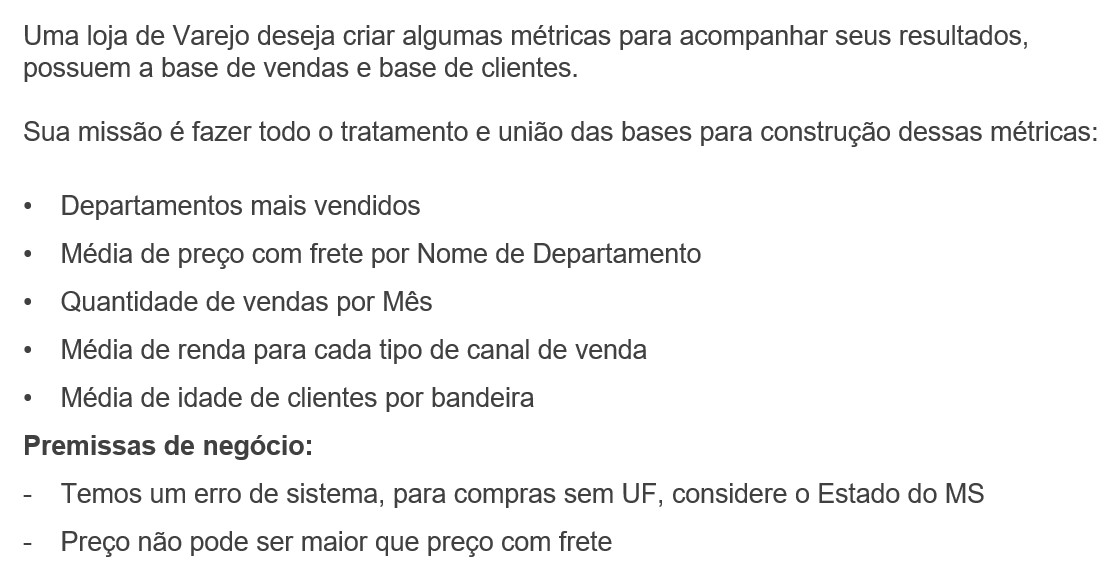

In [287]:
#Instalando bibliotecas
%pip install plotly
%pip install cufflinks
%pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [288]:
#importando bibliotecas
import pandas as pd
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [289]:
# Importando base de vendas
vendas = pd.read_excel("varejo.xlsx")

In [290]:
# Verificando as 5 primeiras linhas
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [291]:
# Verificando tamanho da base
vendas.shape

(80228, 9)

In [292]:
# Verificando as informações do DataFrame: Quantidade de valores não nulos e o tipo de dados
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [293]:
# Gerando parâmetros estatisticos
vendas.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,80228.000000,79926.000000,80228.000000,80228.000000
mean,251001.882448,906.589129,908.619823,13935.464676
std,144272.920296,1059.607721,1057.583101,8065.215581
min,0.000000,6.320000,6.320000,1.000000
25%,126835.000000,144.320000,150.706000,6920.750000
50%,251760.000000,531.240000,535.120000,13938.000000
75%,375925.000000,1199.200000,1215.240000,20918.000000
max,723410.000000,14439.240000,14439.240000,27982.000000


In [294]:
# Verificando coluna idcanalvenda
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [295]:
# Alterando valores da coluna idcanalvenda
vendas.idcanalvenda = vendas.idcanalvenda.replace("APP", "Aplicativo")

In [296]:
# Verificando coluna idcanalvenda novamente
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [297]:
# Verificando coluna bandeira
vendas.groupby("bandeira").idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [298]:
# Verificando colunas estado
vendas.groupby("estado").idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [299]:
# Verificando colunas Nome_Departamento
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [300]:
# Alterando os nomes dos departamentos e colocando um "_" no lugar dos espaços
vendas.Nome_Departamento = vendas.Nome_Departamento.str.replace(" ", "_")
vendas.Nome_Departamento = vendas.Nome_Departamento.str.replace(",", "")

In [301]:
# Verificando a coluna Nome_Departamento após mudara alteração do nome dos valores
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama_Mesa_e_Banho           153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [302]:
# Tratando valores nulos
# Coluna estado
vendas.estado.fillna("MS", inplace = True)
#forma alternativa de tratar dados Nulos = vendas.loc[vendas.estado.isnull(), "estado"] = "MS"
# Coluna Preço
media_venda = vendas.loc[vendas.Preço.notnull(), "Preço"].mean()
vendas.loc[vendas.Preço.isnull(), "Preço"] = media_venda
# outra forma de tratar esses dados = vendas.Preço.fillna(media_venda, inplace = True)

In [303]:
# Verificando novamente as informações após o tratamento de dados nulos
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [304]:
# Analisando dados estatistícos das colunas Preço e Preço_com_frete para verificar se existem preços de valores maiores que preços com frete
vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [305]:
# Excluindo valores da coluna de preços que estão incorretos
# Importando a biblioteca numpy para auxiliar na exclusão de dados
import numpy as np
# Convertendo os valores incorretos em nulos
vendas.loc[(vendas.Preço >= vendas.Preço_com_frete), "Preço"] = np.nan
# Verificando a base
vendas_correto = vendas.dropna()
vendas_correto

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060
...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206


In [306]:
#Verificando se os dados de preço estão de acordo com as premissas dos negócios após as mudanças
vendas_correto[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,22047.000000,22047.000000
mean,549.518401,567.332688
std,846.295127,863.458763
min,8.720000,9.512000
25%,93.528000,100.800000
50%,183.200000,193.912000
75%,661.680000,676.736000
max,14391.200000,14407.120000


In [307]:
# Departamentos mais vendidos
venda_departamento = vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()
venda_departamento

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [308]:
# Gerando um gráfico de barras com o plotly.express
px.bar(venda_departamento, x = "Nome_Departamento", y = "idcompra")

In [309]:
# Média de preço com frete por nome de departamento
media_preco_frete = round(vendas_correto.groupby("Nome_Departamento").Preço_com_frete.mean().sort_values(ascending=False).reset_index(),2)
media_preco_frete

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [310]:
# Gerando um gráfico de barras com o plotly.express
px.bar(media_preco_frete, x ="Nome_Departamento", y = "Preço_com_frete")

In [311]:
# Criando uma coluna para mês a partir da coluna de datas
vendas_correto['mes'] = vendas.Data.dt.month

In [312]:
# Verificando as 5 primeiras linhas do dataframe após a criação da nova coluna
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [313]:
# Quantidade de vendas por mês
venda_mes = vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending=False).reset_index()
venda_mes

,mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


In [314]:
# Importando a base de clientes
cliente = pd.read_excel("cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [315]:
# Unindo a base de clientes à base de vendas
vendas_cliente = vendas.merge(cliente, how = "left", on = "cliente_Log")
vendas_cliente

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idade,renda
0,393835,Mobile,A,2023-03-05,NaN,791.280,Telefones_e_Celulares,SP,15042,89,11337
1,411885,Mobile,A,2023-03-17,NaN,679.200,Tablets,SP,17590,54,2050
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,47,8258
3,440055,Aplicativo,A,2023-01-13,NaN,2239.416,TVs_e_Acessorios,SP,2933,39,4671
4,440055,Aplicativo,A,2023-01-13,NaN,2239.416,TVs_e_Acessorios,SP,2933,53,11717
...,...,...,...,...,...,...,...,...,...,...,...
156630,701790,Aplicativo,B,2023-02-11,NaN,879.200,Telefones_e_Celulares,PB,10944,48,7438
156631,701790,Aplicativo,B,2023-02-11,NaN,879.200,Telefones_e_Celulares,PB,10944,71,11116
156632,723410,Aplicativo,B,2023-01-27,NaN,879.200,Telefones_e_Celulares,PB,22242,44,11693
156633,723410,Aplicativo,B,2023-01-27,NaN,879.200,Telefones_e_Celulares,PB,22242,79,11676


In [316]:
# Média de renda para cada tipo de canal de vendas
renda_canal = round(vendas_cliente.groupby("idcanalvenda").renda.mean().reset_index(), 2)
renda_canal

,idcanalvenda,renda
0,Aplicativo,8240.51
1,Internet,8236.34
2,Mobile,8234.67


In [317]:
# Gerando gráfico de barras com o plotly.express
px.bar(renda_canal, x = "idcanalvenda", y = "renda")

In [318]:
# Média de idades de cliêntes por bandeira
idade_bandeira = round(vendas_cliente.groupby("bandeira").idade.mean().reset_index(), 2)
idade_bandeira

,bandeira,idade
0,A,53.46
1,B,53.39


In [319]:
# Gerando um gráfico de barras mais uma vez
px.bar(idade_bandeira, x="bandeira", y = "idade")

In [320]:
# Extra: Quantidade de vendas por data
hitorico_data = vendas_cliente.groupby("Data").idcompra.nunique().reset_index()
hitorico_data

,Data,idcompra
0,2023-01-02,669
1,2023-01-03,607
2,2023-01-04,678
3,2023-01-05,672
4,2023-01-06,676
...,...,...
114,2023-04-26,702
115,2023-04-27,717
116,2023-04-28,652
117,2023-04-29,685


In [321]:
# Gerando um gráfico de linhas com plotly.express
px.line(hitorico_data, x = "Data", y = "idcompra")